In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import neural_network
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('data/HumanResources/HRDataset_v14.csv', encoding='utf-8')
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,05/11/85,M,Single,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,05/04/82,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [4]:
df.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [6]:
df = df.drop('DateofTermination', axis=1)

In [7]:
df[df['ManagerID'].isna()]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
19,"Becker, Scott",10277,0,0,1,3,5,3,0,53250,0,19,Production Technician I,MA,2452,04/06/79,M,Single,US Citizen,No,Asian,7/8/2013,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,4.20,4,0,1/11/2019,0,13
30,"Buccheri, Joseph",10184,0,0,1,1,5,3,0,65288,0,20,Production Technician II,MA,1013,07/28/83,M,Single,US Citizen,No,White,9/29/2014,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Google Search,Fully Meets,3.19,3,0,2/1/2019,0,9
44,"Chang, Donovan E",10154,0,0,1,1,5,3,0,60380,0,19,Production Technician I,MA,1845,08/24/83,M,Single,US Citizen,No,White,7/8/2013,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,3.80,5,0,1/14/2019,0,4
88,"Fancett, Nicole",10136,0,0,0,1,5,3,0,65902,0,20,Production Technician II,MA,2324,09/27/87,F,Single,US Citizen,No,Black or African American,2/17/2014,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,4.00,4,0,1/7/2019,0,7
135,"Hutter, Rosalie",10214,0,3,0,2,5,3,0,64995,0,20,Production Technician II,MA,2351,05/07/92,F,Separated,US Citizen,No,White,6/5/2015,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Indeed,Fully Meets,4.50,3,0,2/14/2019,0,6
177,"Manchester, Robyn",10077,1,1,0,2,5,3,0,62385,0,20,Production Technician II,MA,2324,08/25/76,F,Married,US Citizen,No,White,5/11/2016,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,5.00,3,0,1/21/2019,0,4
232,"Rivera, Haley",10011,1,1,0,1,5,4,0,46738,0,19,Production Technician I,MA,2171,01/12/73,F,Married,US Citizen,No,Asian,11/28/2011,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Google Search,Exceeds,4.36,5,0,2/11/2019,0,16
251,"Sewkumar, Nori",10071,0,0,0,3,5,3,0,50923,0,19,Production Technician I,MA,2191,03/10/75,F,Single,US Citizen,No,Asian,9/30/2013,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Google Search,Fully Meets,5.00,5,0,2/6/2019,0,14


In [8]:
df[df['ManagerName'] == 'Webster Butler']

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
19,"Becker, Scott",10277,0,0,1,3,5,3,0,53250,0,19,Production Technician I,MA,2452,04/06/79,M,Single,US Citizen,No,Asian,7/8/2013,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,4.20,4,0,1/11/2019,0,13
30,"Buccheri, Joseph",10184,0,0,1,1,5,3,0,65288,0,20,Production Technician II,MA,1013,07/28/83,M,Single,US Citizen,No,White,9/29/2014,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Google Search,Fully Meets,3.19,3,0,2/1/2019,0,9
44,"Chang, Donovan E",10154,0,0,1,1,5,3,0,60380,0,19,Production Technician I,MA,1845,08/24/83,M,Single,US Citizen,No,White,7/8/2013,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,3.80,5,0,1/14/2019,0,4
65,"DeGweck, James",10070,1,1,1,5,5,3,0,55722,1,19,Production Technician I,MA,1810,10/31/77,M,Married,US Citizen,No,White,5/16/2011,unhappy,Voluntarily Terminated,Production,Webster Butler,39.0,Indeed,Fully Meets,5.00,4,0,4/2/2016,0,14
88,"Fancett, Nicole",10136,0,0,0,1,5,3,0,65902,0,20,Production Technician II,MA,2324,09/27/87,F,Single,US Citizen,No,Black or African American,2/17/2014,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,4.00,4,0,1/7/2019,0,7
89,"Ferguson, Susan",10189,1,1,0,5,5,3,0,57748,1,19,Production Technician I,MA,2176,04/14/55,F,Married,US Citizen,No,White,11/7/2011,military,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,3.13,3,0,2/4/2016,0,16
105,"Gilles, Alex",10283,1,1,1,5,5,2,1,54933,1,19,Production Technician I,MA,2062,08/09/74,M,Married,US Citizen,No,Black or African American,4/2/2012,military,Voluntarily Terminated,Production,Webster Butler,39.0,Diversity Job Fair,Needs Improvement,3.97,4,0,1/20/2015,3,15
124,"Harrington, Christie",10097,0,0,0,5,5,3,0,52177,1,19,Production Technician I,MA,2324,08/18/52,F,Single,US Citizen,No,White,1/9/2012,retiring,Voluntarily Terminated,Production,Webster Butler,39.0,CareerBuilder,Fully Meets,4.64,4,0,5/2/2015,0,8
135,"Hutter, Rosalie",10214,0,3,0,2,5,3,0,64995,0,20,Production Technician II,MA,2351,05/07/92,F,Separated,US Citizen,No,White,6/5/2015,N/A-StillEmployed,Active,Production,Webster Butler,NaN,Indeed,Fully Meets,4.50,3,0,2/14/2019,0,6


In [9]:
df['ManagerID'] = df['ManagerID'].fillna(39.0)

In [10]:
df.isna().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialP

In [21]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,05/11/85,M,Single,US Citizen,No,White,7/7/2014,N/A-StillEmployed,Active,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,05/04/82,F,Single,US Citizen,No,Asian,9/2/2008,Another position,Voluntarily Terminated,Production,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No,White,4/10/2010,N/A-StillEmployed,Active,IT/IS,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,US Citizen,No,White,3/30/2015,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [22]:
df = df[df.dtypes[df.dtypes != 'object'].index]

In [14]:
df[df.dtypes[df.dtypes == 'object'].index].nunique()

Employee_Name                 311
Position                       32
State                          28
DOB                           307
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                    101
TermReason                     18
EmploymentStatus                3
Department                      6
ManagerName                    21
RecruitmentSource               9
PerformanceScore                4
LastPerformanceReview_Date    137
dtype: int64

<AxesSubplot:>

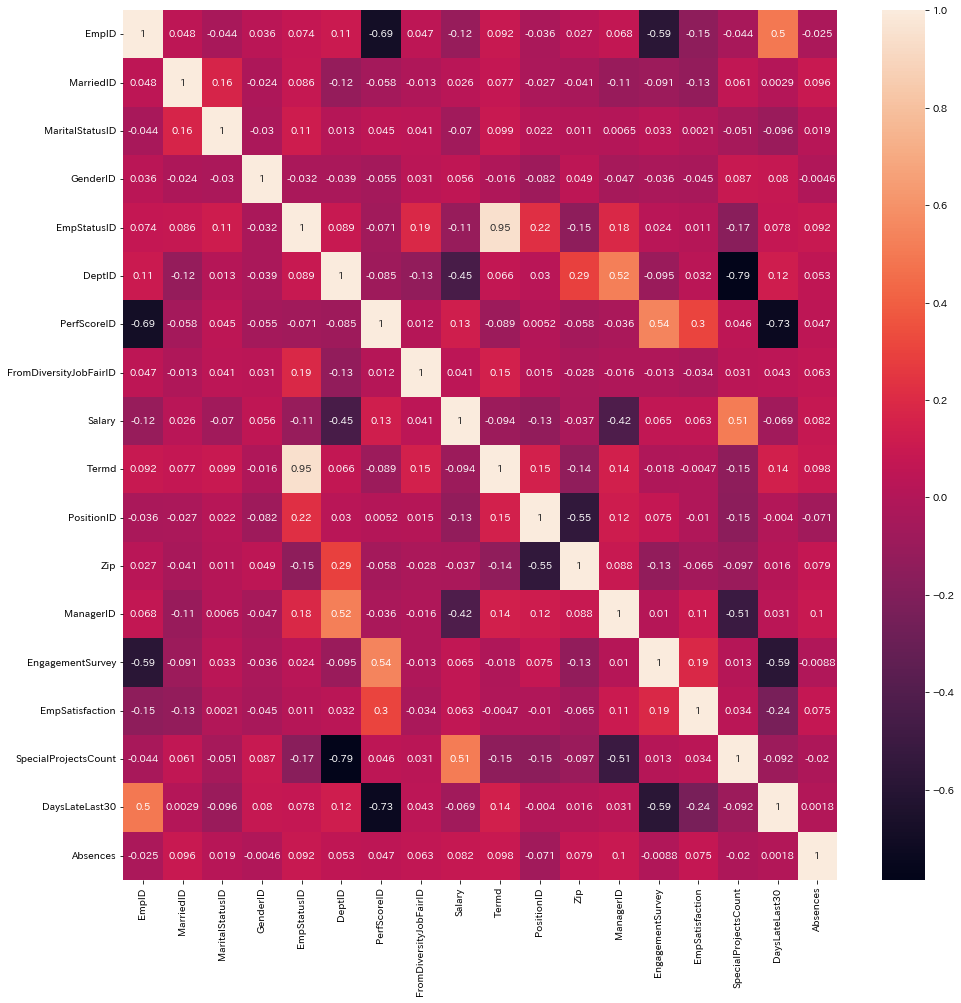

In [23]:
import seaborn as sns
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True)

In [24]:
df

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,10026,0,0,1,1,5,4,0,62506,0,19,1960,22.0,4.60,5,0,0,1
1,10084,1,1,1,5,3,3,0,104437,1,27,2148,4.0,4.96,3,6,0,17
2,10196,1,1,0,5,5,3,0,64955,1,20,1810,20.0,3.02,3,0,0,3
3,10088,1,1,0,1,5,3,0,64991,0,19,1886,16.0,4.84,5,0,0,15
4,10069,0,2,0,5,5,3,0,50825,1,19,2169,39.0,5.00,4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,10135,0,0,1,1,5,3,0,65893,0,20,1810,20.0,4.07,4,0,0,13
307,10301,0,0,0,5,5,1,0,48513,1,19,2458,12.0,3.20,2,0,5,4
308,10010,0,0,0,1,3,4,0,220450,0,6,2067,2.0,4.60,5,6,0,16
309,10043,0,0,0,1,3,3,0,89292,0,9,2148,4.0,5.00,3,5,0,11


In [43]:
X = df.drop(['EmpID','PerfScoreID'], axis=1)
X = X[['DaysLateLast30', 'EmpSatisfaction', 'ManagerID', 'EngagementSurvey', 'Salary']]
y = df['PerfScoreID']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(248, 5)
(63, 5)


In [44]:
models = [linear_model.LinearRegression(),
          neighbors.KNeighborsRegressor(),
          svm.SVR(),
          neural_network.MLPRegressor(),
          tree.DecisionTreeRegressor(max_depth=3),
          ensemble.RandomForestRegressor(max_depth=3),
          ensemble.GradientBoostingRegressor(n_estimators=100)]

In [45]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['決定係数(訓練)'] = metrics.r2_score(y_train, y_pred)
    dic['平均絶対誤差(訓練)'] = metrics.mean_absolute_error(y_train, y_pred)
    dic['平均二乗誤差(訓練)'] = metrics.mean_squared_error(y_train, y_pred)
    dic['二乗平均平方根誤差(訓練)'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    y_pred = model.predict(X_test)
    dic['決定係数(テスト)'] = metrics.r2_score(y_test, y_pred)
    dic['平均絶対誤差(テスト)'] = metrics.mean_absolute_error(y_test, y_pred)
    dic['平均二乗誤差(テスト)'] = metrics.mean_squared_error(y_test, y_pred)
    dic['二乗平均平方根誤差(テスト)'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

,モデル名,決定係数(訓練),平均絶対誤差(訓練),平均二乗誤差(訓練),二乗平均平方根誤差(訓練),決定係数(テスト),平均絶対誤差(テスト),平均二乗誤差(テスト),二乗平均平方根誤差(テスト)
0,LinearRegression,0.601794,0.247100,0.136165,0.369005,0.494539,0.271454,0.176510,0.420131
1,KNeighborsRegressor,0.215117,0.337097,0.268387,0.518061,0.045455,0.377778,0.333333,0.577350
2,SVR,0.023569,0.307798,0.333886,0.577829,0.013378,0.305202,0.344535,0.586971
3,MLPRegressor,-79006.890965,153.819866,27016.372185,164.366579,-71909.099024,151.902685,25111.463151,158.465968
4,DecisionTreeRegressor,0.692750,0.193492,0.105063,0.324134,0.648306,0.217311,0.122814,0.350448
5,RandomForestRegressor,0.695395,0.213391,0.104158,0.322736,0.612531,0.232248,0.135307,0.367841
6,GradientBoostingRegressor,0.895678,0.116015,0.035672,0.188872,0.548699,0.241213,0.157597,0.396985


In [46]:
from sklearn.preprocessing import StandardScaler

scaling_columns = X_train.columns
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [47]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['決定係数(訓練)'] = metrics.r2_score(y_train, y_pred)
    dic['平均絶対誤差(訓練)'] = metrics.mean_absolute_error(y_train, y_pred)
    dic['平均二乗誤差(訓練)'] = metrics.mean_squared_error(y_train, y_pred)
    dic['二乗平均平方根誤差(訓練)'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    y_pred = model.predict(X_test)
    dic['決定係数(テスト)'] = metrics.r2_score(y_test, y_pred)
    dic['平均絶対誤差(テスト)'] = metrics.mean_absolute_error(y_test, y_pred)
    dic['平均二乗誤差(テスト)'] = metrics.mean_squared_error(y_test, y_pred)
    dic['二乗平均平方根誤差(テスト)'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,モデル名,決定係数(訓練),平均絶対誤差(訓練),平均二乗誤差(訓練),二乗平均平方根誤差(訓練),決定係数(テスト),平均絶対誤差(テスト),平均二乗誤差(テスト),二乗平均平方根誤差(テスト)
0,LinearRegression,0.601794,0.247100,0.136165,0.369005,0.494539,0.271454,0.176510,0.420131
1,KNeighborsRegressor,0.688216,0.199194,0.106613,0.326516,0.407273,0.241270,0.206984,0.454955
2,SVR,0.688968,0.190164,0.106356,0.326123,0.552716,0.223909,0.156195,0.395215
3,MLPRegressor,0.376929,0.331700,0.213056,0.461580,0.217392,0.370140,0.273292,0.522773
4,DecisionTreeRegressor,0.692750,0.193492,0.105063,0.324134,0.648306,0.217311,0.122814,0.350448
5,RandomForestRegressor,0.694224,0.213676,0.104559,0.323355,0.615051,0.232809,0.134427,0.366642
6,GradientBoostingRegressor,0.895678,0.116015,0.035672,0.188872,0.557691,0.238898,0.154457,0.393010


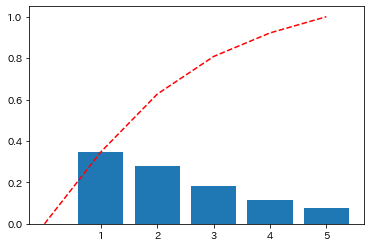

In [48]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio, color='red', linestyle='dashed')
plt.xticks(range(1, X_train.shape[-1]+1))
plt.show()

In [49]:
n = 4
columns=[f'PC{i+1}' for i in range(n)]
X_train_pca = pd.DataFrame(X_train_pca[:,:n], columns=columns)
X_test_pca = pd.DataFrame(X_test_pca[:,:n], columns=columns)

In [50]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train_pca,y_train)
    y_pred = model.predict(X_train_pca)
    dic['決定係数(訓練)'] = metrics.r2_score(y_train, y_pred)
    dic['平均絶対誤差(訓練)'] = metrics.mean_absolute_error(y_train, y_pred)
    dic['平均二乗誤差(訓練)'] = metrics.mean_squared_error(y_train, y_pred)
    dic['二乗平均平方根誤差(訓練)'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    y_pred = model.predict(X_test_pca)
    dic['決定係数(テスト)'] = metrics.r2_score(y_test, y_pred)
    dic['平均絶対誤差(テスト)'] = metrics.mean_absolute_error(y_test, y_pred)
    dic['平均二乗誤差(テスト)'] = metrics.mean_squared_error(y_test, y_pred)
    dic['二乗平均平方根誤差(テスト)'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,モデル名,決定係数(訓練),平均絶対誤差(訓練),平均二乗誤差(訓練),二乗平均平方根誤差(訓練),決定係数(テスト),平均絶対誤差(テスト),平均二乗誤差(テスト),二乗平均平方根誤差(テスト)
0,LinearRegression,0.564340,0.285732,0.148972,0.385969,0.430586,0.313458,0.198843,0.445918
1,KNeighborsRegressor,0.657557,0.211290,0.117097,0.342194,0.543636,0.225397,0.159365,0.399206
2,SVR,0.683042,0.193349,0.108382,0.329214,0.504658,0.225205,0.172977,0.415904
3,MLPRegressor,0.400599,0.350232,0.204962,0.452728,0.234507,0.376772,0.267315,0.517025
4,DecisionTreeRegressor,0.686827,0.197159,0.107088,0.327243,0.391733,0.263871,0.212411,0.460880
5,RandomForestRegressor,0.715392,0.202580,0.097320,0.311962,0.459073,0.252140,0.188895,0.434620
6,GradientBoostingRegressor,0.937270,0.089741,0.021450,0.146459,0.422858,0.249896,0.201542,0.448934
